In [1]:
import torch
from torchvision import datasets, transforms, models

from projections import LayerModifier
from notebook_train import run_train_test_loop, test
from cifar_model import mCNN_k


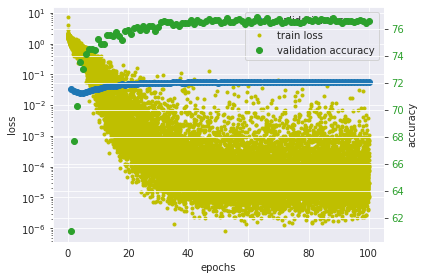

best acc: 76.83


In [2]:
# for now, no augmentations

torch.manual_seed(0)

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=32, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=32)

model = models.resnet18(pretrained=False).to(device)

    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_resnet18", epochs=100, device=device)    
else:
    model = model.eval()
    state_dict = torch.load("models/cifar_10_resnet18.pt",) # map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)


In [ ]:
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

In [ ]:
# pip install torchinfo
from torchinfo import summary


summary(model, input_size=(1, 3, 32, 32))

## CIFAR-10 experiments *with* random initialization for layers > $i$

In [ ]:
net1 = mCNN_k().to(device)
net1[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
for p in net1[0].parameters():
    p.requires_grad = False

new_state_dict = net1.state_dict()
state_dict = torch.load("models/cifar_10_resnet18.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("0", "0.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net1.load_state_dict(new_state_dict)
test(net1, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net1)

In [ ]:
run_train_test_loop(
    net1, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_layer1_reinit_conv1x1", 
    epochs=50, 
    device=device
)    

In [ ]:
net2 = mCNN_k().to(device)
net2[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
net2[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)

for p in net2[0].parameters():
    p.requires_grad = False
for p in net2[2].parameters():
    p.requires_grad = False

new_state_dict = net2.state_dict()
state_dict = torch.load("models/cifar_10_resnet18_freeze_layer1_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("2", "2.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net2.load_state_dict(new_state_dict)
test(net2, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net2)

In [ ]:
run_train_test_loop(
    net2, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_layer2_reinit_conv1x1", 
    epochs=50, 
    device=device
)    

In [ ]:
state_dict.keys()

In [ ]:
net3 = mCNN_k().to(device)
net3[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
net3[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)
net3[5] = LayerModifier(torch.nn.Conv2d(64 * 2, 64 * 4, kernel_size=3, stride=1, padding=1, bias=False), dims=256).to(device)

for p in net3[0].parameters():
    p.requires_grad = False
for p in net3[2].parameters():
    p.requires_grad = False
for p in net3[5].parameters():
    p.requires_grad = False


new_state_dict = net3.state_dict()
state_dict = torch.load("models/cifar_10_resnet18_freeze_layer2_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("5", "5.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net3.load_state_dict(new_state_dict)
test(net3, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net3)

In [ ]:
run_train_test_loop(
    net3, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_layer3_reinit_conv1x1", 
    epochs=50, 
    device=device
)    

In [ ]:
net4 = mCNN_k().to(device)
net4[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
net4[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)
net4[5] = LayerModifier(torch.nn.Conv2d(64 * 2, 64 * 4, kernel_size=3, stride=1, padding=1, bias=False), dims=256).to(device)
net4[8] = LayerModifier(torch.nn.Conv2d(64 * 4, 64 * 8, kernel_size=3, stride=1, padding=1, bias=False), dims=512).to(device)

for p in net4[0].parameters():
    p.requires_grad = False
for p in net4[2].parameters():
    p.requires_grad = False
for p in net4[5].parameters():
    p.requires_grad = False
for p in net4[8].parameters():
    p.requires_grad = False


new_state_dict = net4.state_dict()
state_dict = torch.load("models/cifar_10_resnet18_freeze_layer3_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("8", "8.original_op"): v for k, v in state_dict.items()}
# new_state_dict.update(state_dict)
# net4.load_state_dict(new_state_dict)
# test(net4, device, test_loader, torch.nn.CrossEntropyLoss())
# summary(net4)

In [ ]:
state_dict.keys()

In [ ]:
run_train_test_loop(
    net4, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_layer4_reinit_conv1x1", 
    epochs=50, 
    device=device
)    

In [ ]:
net_freeze = mCNN_k().to(device)

for p in net_freeze.parameters():
    p.requires_grad = False

net_freeze[13] = torch.nn.Linear(64 * 8, 10, bias=False).to(device)
# new_state_dict = net4.state_dict()
# state_dict = torch.load("models/cifar_10_resnet18_freeze_layer3_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))]
# # hacky as hell
# state_dict = {k.replace("8", "8.original_op"): v for k, v in state_dict.items()}
# new_state_dict.update(state_dict)
# net4.load_state_dict(new_state_dict)
test(net_freeze, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net_freeze)

In [ ]:
run_train_test_loop(
    net_freeze, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_all_layers", 
    epochs=50, 
    device=device
)    

In [ ]:
net5 = mCNN_k().to(device)
# net5[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
# net5[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)
# net5[5] = LayerModifier(torch.nn.Conv2d(64 * 2, 64 * 4, kernel_size=3, stride=1, padding=1, bias=False), dims=256).to(device)
net5[8] = LayerModifier(
    torch.nn.Conv2d(64 * 4, 64 * 8, kernel_size=3, stride=1, padding=1, bias=False), dims=512
).to(device)

for p in net5[0].parameters():
    p.requires_grad = False
for p in net5[2].parameters():
    p.requires_grad = False
for p in net5[5].parameters():
    p.requires_grad = False
for p in net5[8].parameters():
    p.requires_grad = False


new_state_dict = net5.state_dict()
state_dict = torch.load("models/cifar_10_resnet18.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("8", "8.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net5.load_state_dict(new_state_dict)
test(net5, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net5)

In [ ]:
run_train_test_loop(
    net5, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_freeze_all_layers_random_ortho_final", 
    epochs=50, 
    device=device
)    

In [ ]:
net6 = mCNN_k().to(device)
# net6[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
# net6[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)
# net6[5] = LayerModifier(torch.nn.Conv2d(64 * 2, 64 * 4, kernel_size=3, stride=1, padding=1, bias=False), dims=256).to(device)
# net6[8] = LayerModifier(
#     torch.nn.Conv2d(64 * 4, 64 * 8, kernel_size=3, stride=1, padding=1, bias=False), dims=512
# ).to(device)

for p in net6[0].parameters():
    p.requires_grad = False
for p in net6[2].parameters():
    p.requires_grad = False
# for p in net6[5].parameters():
#     p.requires_grad = False
# for p in net6[8].parameters():
#     p.requires_grad = False


new_state_dict = net6.state_dict()
state_dict = torch.load("models/cifar_10_resnet18.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
# state_dict = {k.replace("8", "8.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net6.load_state_dict(new_state_dict)
test(net6, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net6)

In [ ]:
run_train_test_loop(
    net6, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_last_two_layers", 
    epochs=50, 
    device=device
)    

In [ ]:
net7 = mCNN_k().to(device)
# net5[0] = LayerModifier(torch.nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True), dims=64).to(device)
# net5[2] = LayerModifier(torch.nn.Conv2d(64, 64 * 2, kernel_size=3, stride=1, padding=1, bias=False), dims=128).to(device)
net7[5] = LayerModifier(
    torch.nn.Conv2d(64 * 2, 64 * 4, kernel_size=3, stride=1, padding=1, bias=False), dims=256
).to(device)
# net5[8] = LayerModifier(
#     torch.nn.Conv2d(64 * 4, 64 * 8, kernel_size=3, stride=1, padding=1, bias=False), dims=512
# ).to(device)

for p in net7[0].parameters():
    p.requires_grad = False
for p in net7[2].parameters():
    p.requires_grad = False
for p in net7[5].parameters():
    p.requires_grad = False
# for p in net5[8].parameters():
#     p.requires_grad = False


new_state_dict = net7.state_dict()
state_dict = torch.load("models/cifar_10_resnet18.pt",) # map_location=torch.device('cpu'))]
# hacky as hell
state_dict = {k.replace("5", "5.original_op"): v for k, v in state_dict.items()}
new_state_dict.update(state_dict)
net7.load_state_dict(new_state_dict)
test(net7, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net7)

In [ ]:
run_train_test_loop(
    net7, 
    train_loader, 
    test_loader, 
    "cifar_10_resnet18_last_two_layers_ortho_before", 
    epochs=50, 
    device=device
)    